In [2]:
import os

import wave
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import Audio

import librosa
import librosa.display

from keras.utils import np_utils
from keras.layers.merge import concatenate
from tensorflow.keras.models import Sequential, Model, load_model

from tensorflow.keras.layers import Conv1D, Conv2D, SeparableConv1D, MaxPooling1D, MaxPooling2D
from tensorflow.keras.layers import Input, add, Flatten, Dense, BatchNormalization, Dropout, LSTM, GRU
from tensorflow.keras.layers import GlobalMaxPooling1D, GlobalMaxPooling2D, Activation, LeakyReLU, ReLU

# from tensorflow.keras.layers import Embedding,LSTM,GRU,Dense,MaxPooling1D,Dropout, Input
# from tensorflow.keras.layers import LeakyReLU,ReLU,Flatten,concatenate,Bidirectional,TimeDistributed 
# from tensorflow.keras.layers import add,Conv1D,SeparableConv1D, GlobalMaxPooling2D,GlobalMaxPooling1D
# from tensorflow.keras.layers import Conv2D,Input,Activation,BatchNormalization,MaxPooling2D

from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import cohen_kappa_score,roc_auc_score,confusion_matrix,classification_report

In [1]:
!pip install path==16.5.0 matplotlib==3.5.3 keras==2.6.0 numpy==1.21.6 pandas==1.3.5 seaborn==0.11.2 librosa==0.9.2

   ---------------------------------------- 1.3/1.3 MB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 292.8/292.8 kB 2.3 MB/s eta 0:00:00
   ---------------------------------------- 214.3/214.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
  Attempting uninstall: librosa
    Found existing installation: librosa 0.7.0
    Uninstalling librosa-0.7.0:
      Successfully uninstalled librosa-0.7.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.6.0 which is incompatible.


In [3]:
audio_data = "C:/Users/Ravishankar Narasimh/Desktop/db/audio_and_txt_files/"

In [2]:
!pip install tensorflow==2.6.4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   -----                                   59.8/429.2 MB 735.6 kB/s eta 0:08:23


ERROR: Exception:
Traceback (most recent call last):
  File "c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\http\client.py", line 447, in read
    n = self.readinto(b)
  File "c:\users\ravish

In [4]:
patient_data=pd.read_csv(r'C:\Users\Ravishankar Narasimh\Desktop\db\patient_diagnosis.csv',names=['pid','disease'])

In [5]:
diagnosis_df = pd.read_csv(r'C:\Users\Ravishankar Narasimh\Desktop\db\patient_diagnosis.csv', names=['patient_id', 'disease'])
diagnosis_df.head(4)

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD


In [6]:
print (diagnosis_df.disease.value_counts())
print ('')
print (diagnosis_df.disease.value_counts(normalize=True) *100)

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64


c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

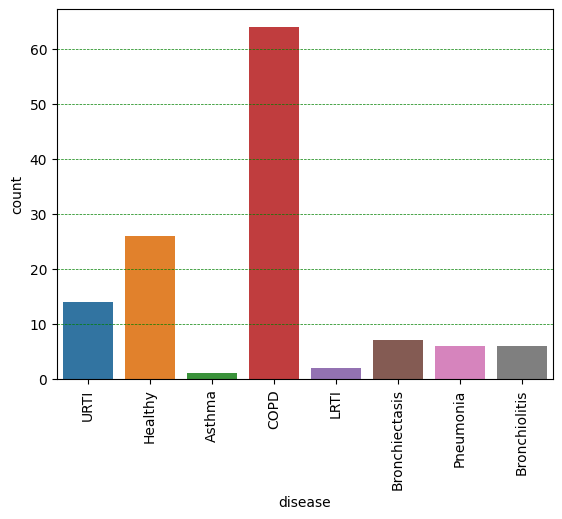

In [7]:
sns.countplot(diagnosis_df.disease)
plt.grid(axis = 'y',color = 'green', linestyle = '--', linewidth = 0.5)
plt.xticks(rotation=90)

In [8]:
path="C:/Users/Ravishankar Narasimh/Desktop/db/audio_and_txt_files"
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [9]:
files[:10]

['101_1b1_Al_sc_Meditron',
 '101_1b1_Pr_sc_Meditron',
 '102_1b1_Ar_sc_Meditron',
 '104_1b1_Al_sc_Litt3200',
 '104_1b1_Ar_sc_Litt3200',
 '104_1b1_Ll_sc_Litt3200',
 '104_1b1_Lr_sc_Litt3200',
 '104_1b1_Pl_sc_Litt3200',
 '104_1b1_Pr_sc_Litt3200',
 '105_1b1_Tc_sc_Meditron']

In [10]:
def add_noise(data,x):
    noise = np.random.randn(len(data))
    data_noise = data + x * noise
    return data_noise

def shift(data,x):
    return np.roll(data, x)

def stretch(data, rate):
    data = librosa.effects.time_stretch(data, rate)
    return data

def pitch_shift (data , rate):
    data = librosa.effects.pitch_shift(data, sr=220250, n_steps=rate)
    return data

In [11]:
def show_audio(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3,2,1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.waveshow(y_noise, sr=sr)
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.waveshow(y_shift, sr=sr)
    plt.title('shift')
    
    plt.subplot(3,2,4)
    librosa.display.waveshow(y_stretch_1, sr=sr)
    plt.title('stretch 1')
    
    plt.subplot(3,2,5)
    librosa.display.waveshow(y_stretch_2, sr=sr)
    plt.title('stretch 2')
    
    plt.subplot(3,2,6)
    librosa.display.waveshow(y_pitch_shift, sr=sr)
    plt.title('pitch shift')

    plt.tight_layout()

In [12]:
def show_audio_features(audio_path):
    y, sr = librosa.load(audio_path)
    y_noise = add_noise(y , 0.0008)
    y_shift = shift(y,3200)
    y_stretch_1 = stretch(y, 1.2)
    y_stretch_2 = stretch(y, 0.8)
    y_pitch_shift = pitch_shift(y, 3)
    
    y = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=50)
    y_noise = librosa.feature.mfcc(y=y_noise, sr=sr, n_mfcc=50)
    y_shift = librosa.feature.mfcc(y=y_shift, sr=sr, n_mfcc=50)
    y_stretch_1 = librosa.feature.mfcc(y=y_stretch_1, sr=sr, n_mfcc=50)
    y_stretch_2 = librosa.feature.mfcc(y=y_stretch_2, sr=sr, n_mfcc=50)
    y_pitch_shift = librosa.feature.mfcc(y=y_pitch_shift, sr=sr, n_mfcc=50)
    
    plt.figure(figsize=(20, 8))
    
    plt.subplot(3,2,1)
    librosa.display.specshow(librosa.power_to_db(y,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('orginal')

    plt.subplot(3,2,2)
    librosa.display.specshow(librosa.power_to_db(y_noise,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('noise')

    plt.subplot(3,2,3)
    librosa.display.specshow(librosa.power_to_db(y_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('shift')
    
    plt.subplot(3,2,4)
    librosa.display.specshow(librosa.power_to_db(y_stretch_1,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 1')
    
    plt.subplot(3,2,5)
    librosa.display.specshow(librosa.power_to_db(y_stretch_2,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('stretch 2')
    
    plt.subplot(3,2,6)
    librosa.display.specshow(librosa.power_to_db(y_pitch_shift,ref=np.max),
                             y_axis='mel',
                             fmax=8000,
                             x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('pitch shift')
    
    

    plt.tight_layout()

c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.
c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.


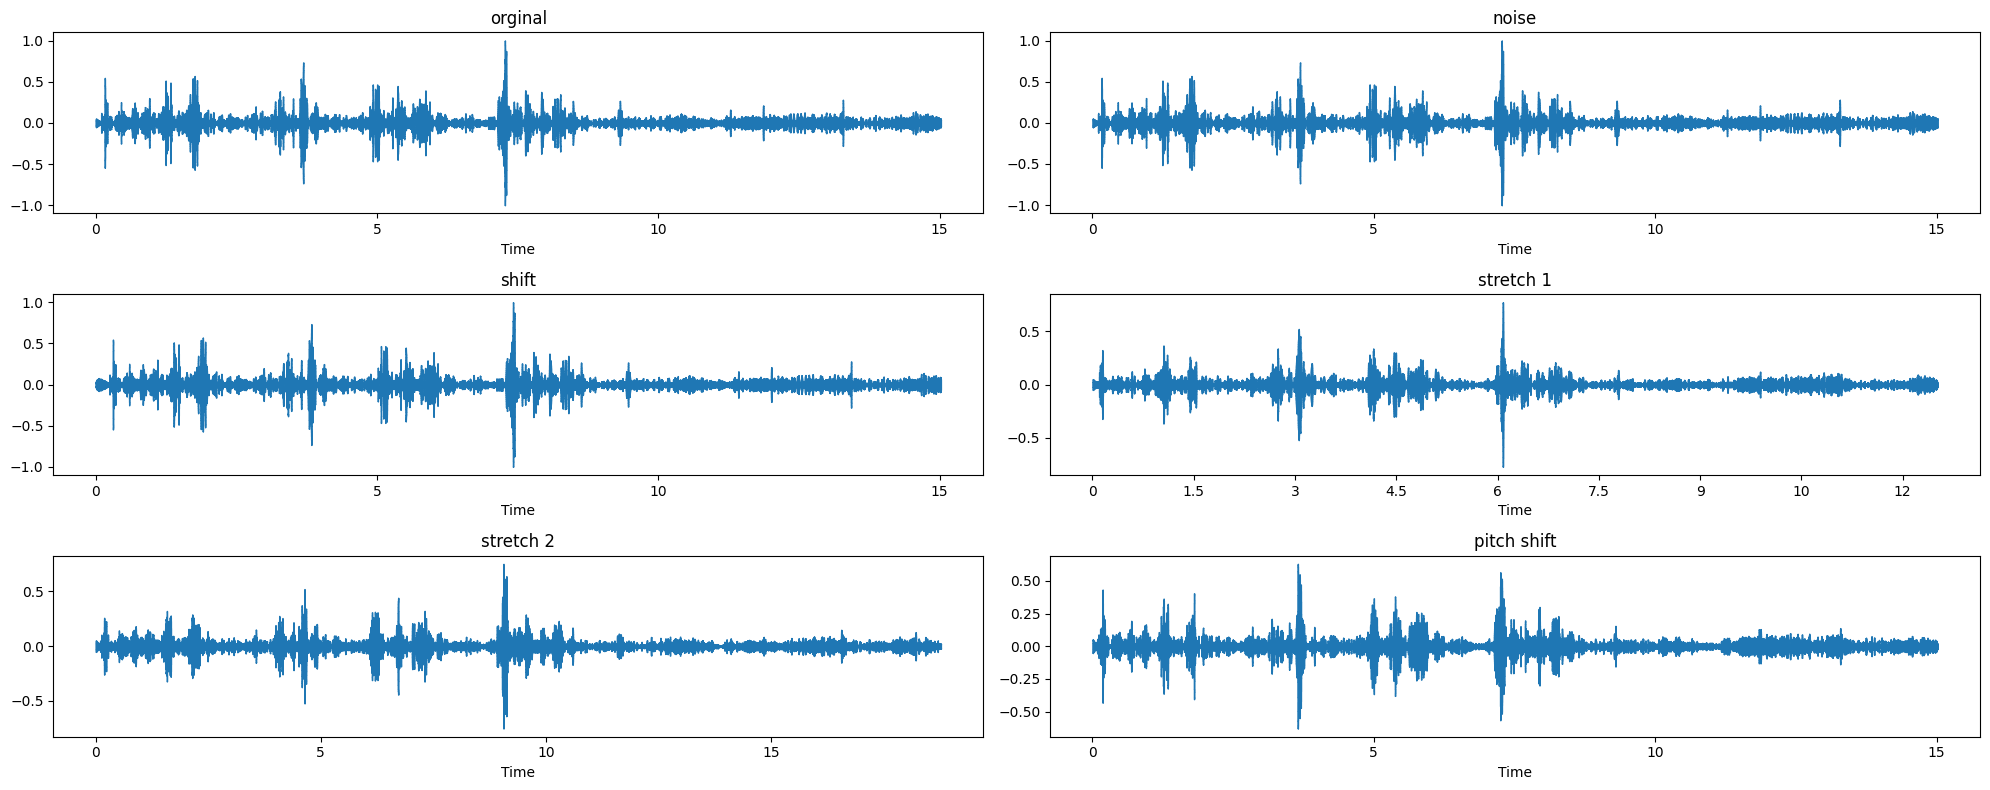

In [13]:
show_audio('C:/Users/Ravishankar Narasimh/Desktop/db/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')

c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.
c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.


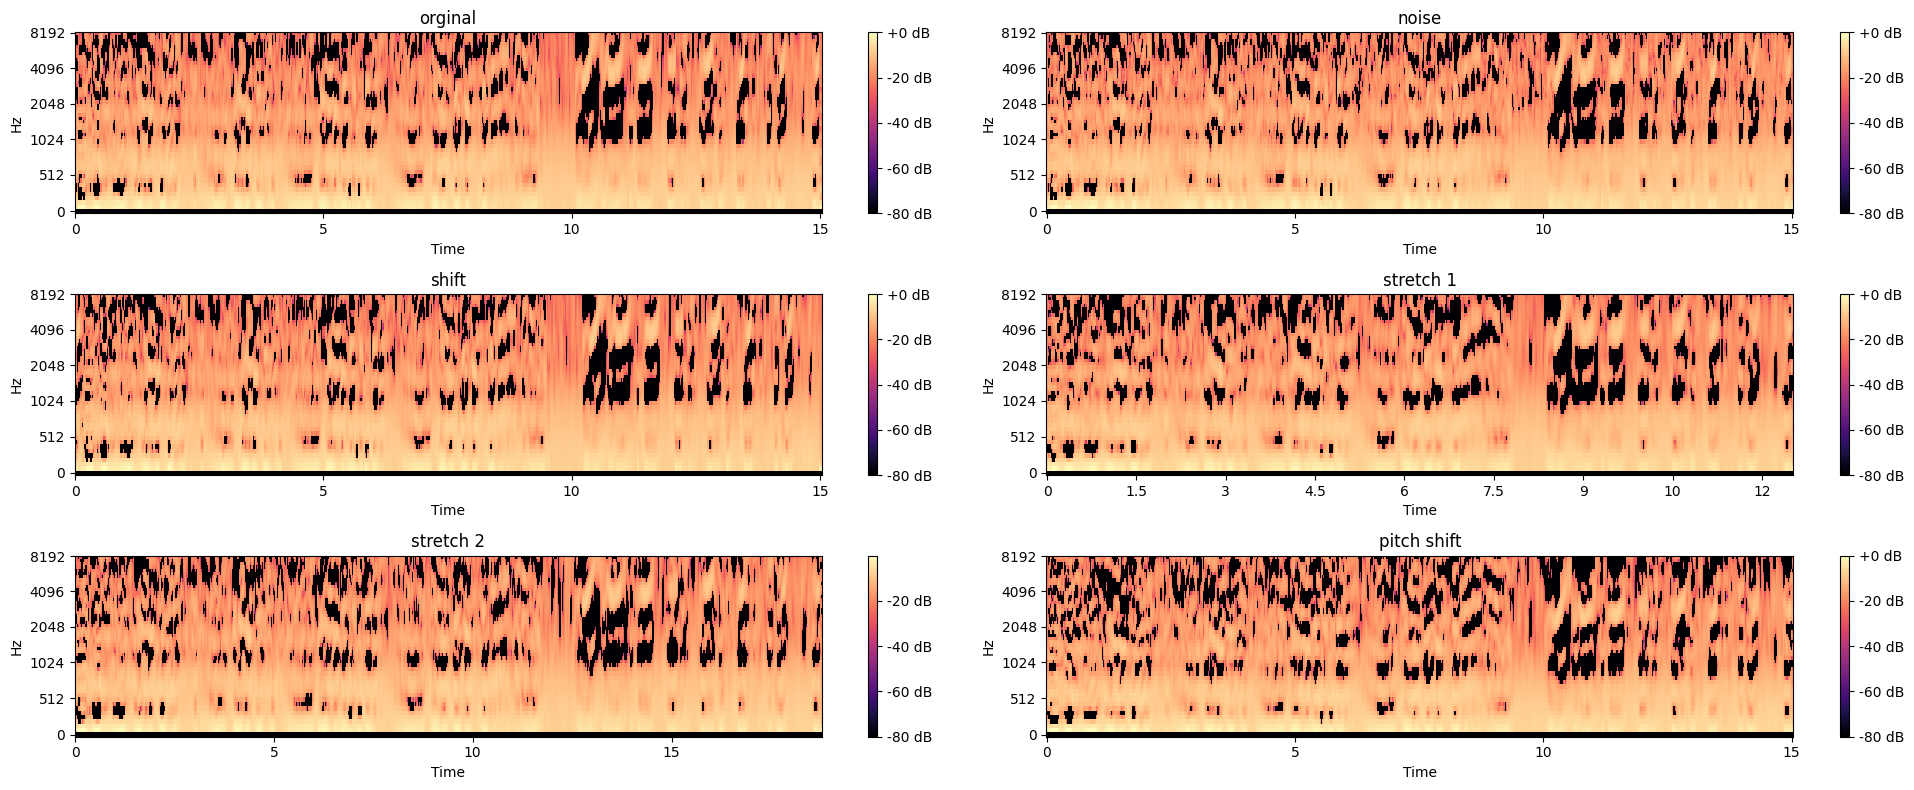

In [14]:
show_audio_features('C:/Users/Ravishankar Narasimh/Desktop/db/audio_and_txt_files/104_1b1_Lr_sc_Litt3200.wav')

In [15]:
def mfccs_feature_exteraction(dir_):
    '''
        Extract MFCC feature from the Sound data from the audio data. 
        Augmentation of sound data by adding Noise, stretching, and shifting.
        50 features are extracted from each audio data and used to train the model. 
        Also, we remove .wav files with patient_id 103,108, and 115 to solve data imbalance because they have unique labels. 
        
        Args: 
            dir_: Input directory to the Sound input file.
        
        Returns:
            X_data: Array of features extracted from the sound file.
            y_data: Array of target Labels.
    '''
    X_=[]
    y_=[]
    
    COPD=[]
    copd_count=0
    
    data = diagnosis_df
    features = 52
    
    for soundDir in (os.listdir(dir_)):
        if soundDir[-3:]=='wav' and soundDir[:3]!='103' and soundDir[:3]!='108' and soundDir[:3]!='115':

            p = list(data[data['patient_id']==int(soundDir[:3])]['disease'])[0]
            if p in ['COPD', 'URTI', 'Pneumonia', 'Bronchiolitis', 'Bronchiectasis', 'Healthy']:
                if (p == 'COPD'):
                    if (soundDir[:6] in COPD) and copd_count<2:
                        data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                        mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                        COPD.append(soundDir[:6])
                        copd_count+=1
                        X_.append(mfccs)
                        y_.append(p)

                    if (soundDir[:6] not in COPD):
                        data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                        mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                        COPD.append(soundDir[:6])
                        copd_count=0
                        X_.append(mfccs)
                        y_.append(p)
                
                else:
                    data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
                    mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs)
                    y_.append(p)

                    data_noise = add_noise(data_x,0.001)
                    mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_noise)
                    y_.append(p)

                    data_shift = shift(data_x,1600)
                    mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_shift)
                    y_.append(p)
                    
                    data_stretch = stretch(data_x,1.2)
                    mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)
                    
                    data_stretch_2 = stretch(data_x,0.8)
                    mfccs_stretch_2 = np.mean(librosa.feature.mfcc(y=data_stretch_2, sr=sampling_rate, n_mfcc=features).T,axis=0)
                    X_.append(mfccs_stretch_2)
                    y_.append(p)
                    
                    data_pitch_shift = pitch_shift(data_x,3)
                    mfccs_stretch = np.mean(librosa.feature.melspectrogram(y=data_pitch_shift, sr=sampling_rate, n_mels=features).T,axis=0)
                    X_.append(mfccs_stretch)
                    y_.append(p)
                    
                    # Additional augmentation for Bronchiectasis and Bronchiolitis
                    if p in ['Bronchiectasis', 'Bronchiolitis', 'URTI']:
                        data_noise = librosa.effects.preemphasis(data_x)
                        mfccs_noise = np.mean(librosa.feature.mfcc(y=data_noise, sr=sampling_rate, n_mfcc=features).T,axis=0)
                        X_.append(mfccs_noise)
                        y_.append(p)
                    
                    # Stretching
                        data_stretch = librosa.effects.time_stretch(data_x, rate=1.2)
                        mfccs_stretch = np.mean(librosa.feature.mfcc(y=data_stretch, sr=sampling_rate, n_mfcc=features).T,axis=0)
                        X_.append(mfccs_stretch)
                        y_.append(p)
                    
                    # Shifting
                        data_shift = np.roll(data_x, shift=1600)
                        mfccs_shift = np.mean(librosa.feature.mfcc(y=data_shift, sr=sampling_rate, n_mfcc=features).T,axis=0)
                        X_.append(mfccs_shift)
                        y_.append(p)
    X_data = np.array(X_)
    y_data = np.array(y_)

    return X_data, y_data 


In [16]:
x_mfccs, y = mfccs_feature_exteraction(audio_data)

c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.
c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.


In [17]:
def augmented_lables_count(labels):
    unique, counts = np.unique(labels, return_counts=True)
    data_count = dict(zip(unique, counts))

    data = data_count

    courses = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize=(10, 5))

    # Ensure that there are six colors for all six diseases
    colors = ['orange', 'green', 'blue', 'red', 'yellow', 'black']

    # creating the bar plot
    plt.bar(courses, values, color=colors, width=0.4)

    plt.xlabel("Diseases")
    plt.ylabel("Count")
    plt.title("Count of each disease")
    plt.show()

    print(data_count)


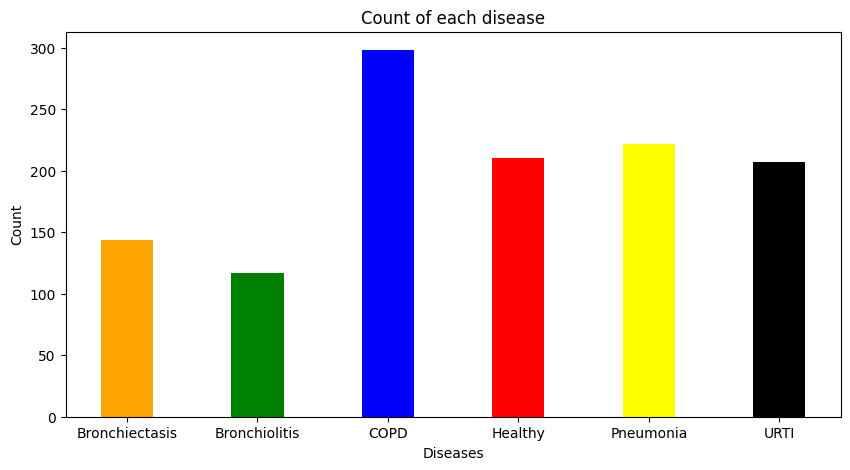

{'Bronchiectasis': 144, 'Bronchiolitis': 117, 'COPD': 298, 'Healthy': 210, 'Pneumonia': 222, 'URTI': 207}


In [18]:
augmented_lables_count(y)

In [19]:
y_data_encode = y.reshape(y.shape[0],1)
y_data_encode = np.where(y_data_encode == 'COPD',np.array([1,0,0,0,0,0]).reshape(1,6) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiolitis',np.array([0,1,0,0,0,0]).reshape(1,6) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Bronchiectasis',np.array([0,0,1,0,0,0]).reshape(1,6) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Pneumonia',np.array([0,0,0,1,0,0]).reshape(1,6) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'URTI',np.array([0,0,0,0,1,0]).reshape(1,6) , y_data_encode)
y_data_encode = np.where(y_data_encode == 'Healthy',np.array([0,0,0,0,0,1]).reshape(1,6) , y_data_encode)

Y_data = y_data_encode.astype('float64')

In [20]:
mfccs_features = np.array(x_mfccs)
lables = np.array(Y_data)

mfccs_features.shape , lables.shape

((1198, 52), (1198, 6))

In [21]:
mfcc_train, mfcc_val, lables_train, lables_val  = train_test_split(mfccs_features, lables, test_size=0.175, random_state=10)
mfcc_train, mfcc_test, lables_train, lables_test = train_test_split(mfcc_train, lables_train, test_size=0.075, random_state=10)

print (mfcc_train.shape, mfcc_val.shape, mfcc_test.shape)
print (lables_train.shape, lables_val.shape, lables_test.shape)

(913, 52) (210, 52) (75, 52)
(913, 6) (210, 6) (75, 6)


In [22]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
#   plt.plot(epochs, loss, label='training_loss')
#   plt.plot(epochs, val_loss, label='val_loss')
#   plt.title('Loss')
#   plt.xlabel('Epochs')
#   plt.legend()
#   plt.grid()


  # Plot accuracy
  plt.figure()
  plt.grid()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


In [23]:
x_train_gru = np.expand_dims(mfcc_train,axis=1)
x_val_gru = np.expand_dims(mfcc_val,axis=1)
x_test_gru = np.expand_dims(mfcc_test,axis=1)

y_train_gru = np.expand_dims(lables_train,axis=1)
y_val_gru = np.expand_dims(lables_val,axis=1)
y_test_gru = np.expand_dims(lables_test,axis=1)

In [24]:
Input_Sample = Input(shape=(1,52))

model_conv = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(Input_Sample)
model_conv = MaxPooling1D(pool_size=2, strides=2, padding='same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_conv = Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu')(model_conv)
model_conv = MaxPooling1D(pool_size=2, strides=2, padding='same')(model_conv)
model_conv = BatchNormalization()(model_conv)

model_2_1 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
model_2 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_2_1)

model_3 = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
model_3 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_3)

model_x = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_conv)
model_x = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_x)

model_add_1 = add([model_3, model_2, model_x])

model_5 = GRU(128, return_sequences=True, activation='tanh', go_backwards=True)(model_add_1)
model_5 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_5)

model_6 = GRU(64, return_sequences=True, activation='tanh', go_backwards=True)(model_add_1)
model_6 = GRU(32, return_sequences=True, activation='tanh', go_backwards=True)(model_6)

model_add_2 = add([model_5, model_6, model_2_1])

model_7 = Dense(32, activation=None)(model_add_2)
model_7 = LeakyReLU()(model_7)
model_7 = Dense(128, activation=None)(model_7)
model_7 = LeakyReLU()(model_7)

model_9 = Dense(64, activation=None)(model_add_2)
model_9 = LeakyReLU()(model_9)
model_9 = Dense(128, activation=None)(model_9)
model_9 = LeakyReLU()(model_9)

model_add_3 = add([model_7, model_9])

model_10 = Dense(64, activation=None)(model_add_3)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(32, activation=None)(model_10)
model_10 = LeakyReLU()(model_10)

model_10 = Dense(6, activation="softmax")(model_10)  # Changed to 6 classes

gru_model = Model(inputs=Input_Sample, outputs=model_10)

gru_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1, 52)]      0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 256)       66816       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 1, 256)       0           conv1d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 256)       1024        max_pooling1d[0][0]              
______________________________________________________________________________________________

In [25]:
tf.keras.utils.plot_model(gru_model, "gru_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [152]:
optimiser = tf.keras.optimizers.Adam(learning_rate = 0.0001)
gru_model.compile(optimizer=optimiser, loss='categorical_crossentropy',metrics=['accuracy'])

cb = [EarlyStopping(patience=300,monitor='accuracy',mode='max',restore_best_weights=True),
      ModelCheckpoint("C:/Users/Ravishankar Narasimh/Desktop/diagnosis_GRU_CNN_1.h5",save_best_only=True)]

In [153]:
history = gru_model.fit(x_train_gru, y_train_gru, batch_size=8, epochs=50, validation_data=(x_val_gru, y_val_gru), callbacks = cb)

Epoch 1/50
115/115 [==============================] - 56s 144ms/step - loss: 0.4261 - accuracy: 0.8226 - val_loss: 0.4151 - val_accuracy: 0.8571


c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
115/115 [==============================] - 6s 50ms/step - loss: 0.3644 - accuracy: 0.8554 - val_loss: 0.5321 - val_accuracy: 0.8048
Epoch 3/50
115/115 [==============================] - 6s 49ms/step - loss: 0.3939 - accuracy: 0.8423 - val_loss: 0.4410 - val_accuracy: 0.8286
Epoch 4/50
115/115 [==============================] - 5s 46ms/step - loss: 0.3613 - accuracy: 0.8587 - val_loss: 0.3738 - val_accuracy: 0.8476
Epoch 5/50
115/115 [==============================] - 5s 46ms/step - loss: 0.3931 - accuracy: 0.8488 - val_loss: 0.4307 - val_accuracy: 0.8238
Epoch 6/50
115/115 [==============================] - 6s 49ms/step - loss: 0.3721 - accuracy: 0.8510 - val_loss: 0.4062 - val_accuracy: 0.8429
Epoch 7/50
115/115 [==============================] - 5s 46ms/step - loss: 0.3663 - accuracy: 0.8478 - val_loss: 0.4547 - val_accuracy: 0.8143
Epoch 8/50
115/115 [==============================] - 5s 47ms/step - loss: 0.3982 - accuracy: 0.8412 - val_loss: 0.3925 - val_accuracy: 0.8095

29/29 [==============================] - 0s 11ms/step - loss: 0.2373 - accuracy: 0.9025


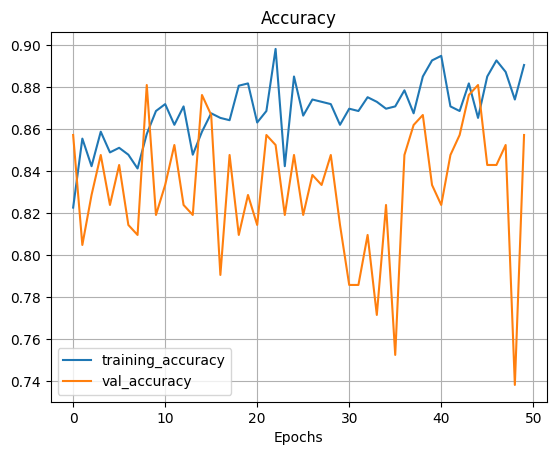

In [154]:
gru_model.evaluate(x_train_gru, y_train_gru)

plot_loss_curves(history)

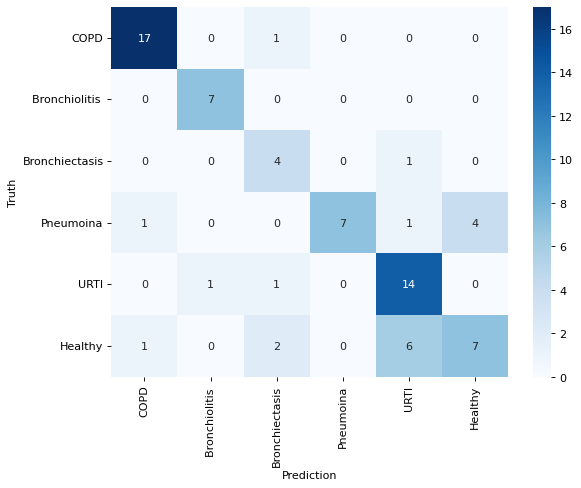

In [155]:
classes = ["COPD" ,"Bronchiolitis ", "Bronchiectasis", "Pneumoina", "URTI", "Healthy"]

preds = gru_model.predict(x_test_gru)
classpreds = [np.argmax(t) for t in preds ]
y_testclass = [np.argmax(t) for t in y_test_gru]
cm = confusion_matrix(y_testclass, classpreds)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)

plt.title('')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

In [157]:
print(classification_report(y_testclass, classpreds, target_names=classes))

                precision    recall  f1-score   support

          COPD       0.89      0.94      0.92        18
Bronchiolitis        0.88      1.00      0.93         7
Bronchiectasis       0.50      0.80      0.62         5
     Pneumoina       1.00      0.54      0.70        13
          URTI       0.64      0.88      0.74        16
       Healthy       0.64      0.44      0.52        16

      accuracy                           0.75        75
     macro avg       0.76      0.77      0.74        75
  weighted avg       0.77      0.75      0.74        75



In [158]:
def gru_diagnosis_prediction(test_audio):
    data_x, sampling_rate = librosa.load(test_audio)
    data_x = stretch (data_x,1.2)

    features = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=52).T,axis = 0)

    features = features.reshape(1,52)

    test_pred = gru_model.predict(np.expand_dims(features, axis = 1))
    classpreds = classes[np.argmax(test_pred[0], axis=1)[0]]
    confidence = (test_pred.T[test_pred[0].mean(axis=0).argmax()].mean())*100

    print (classpreds , confidence)

In [185]:
gru_diagnosis_prediction(r"C:\Users\Ravishankar Narasimh\Desktop\db\audio_and_txt_files\121_1b1_Tc_sc_Meditron.wav")

c:\users\ravishankar narasimh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: Pass rate=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  # Remove the CWD from sys.path while we load stuff.


Healthy 99.98974800109863


In [52]:
val=[]
dir_= r'C:/Users/Ravishankar Narasimh/Desktop/db/audio_and_txt_files/119_1b1_Ar_sc_Meditron.wav'
features = 52

soundDir = ''#'/kaggle/input/respiratory-test'
data_x, sampling_rate = librosa.load(dir_+soundDir,res_type='kaiser_fast')
mfccs = np.mean(librosa.feature.mfcc(y=data_x, sr=sampling_rate, n_mfcc=features).T,axis=0)
val.append(mfccs)
val = np.expand_dims(val,axis=1)

In [53]:
classes[np.argmax(gru_model.predict(val))]

'URTI'